In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./406381131_T_ONTIME_REPORTING-001.csv")
data.fillna(0)
data.shape
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,2020,1,1,1,3,2020-01-01,WN,13891,ONT,14771,...,122.0,74.0,363.0,2,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,1,3,2020-01-01,WN,13891,ONT,14771,...,92.0,71.0,363.0,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,2020-01-01,WN,13891,ONT,14831,...,68.0,57.0,333.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,2020-01-01,WN,13891,ONT,14831,...,75.0,63.0,333.0,2,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,2020-01-01,WN,13891,ONT,14831,...,67.0,57.0,333.0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.drop(['YEAR','QUARTER', 'DAY_OF_MONTH','FL_DATE','ORIGIN','DEST','Unnamed: 32', 'OP_UNIQUE_CARRIER', 'CANCELLATION_CODE'], axis=1)

In [4]:
data.head()

,MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,3,13891,14771,41.0,1.0,2.0,44.0,1935.0,2049.0,...,95.0,122.0,74.0,363.0,2,8.0,0.0,27.0,0.0,33.0
1,1,3,13891,14771,0.0,0.0,-1.0,13.0,1159.0,1310.0,...,90.0,92.0,71.0,363.0,2,NaN,NaN,NaN,NaN,NaN
2,1,3,13891,14831,0.0,0.0,-1.0,8.0,2024.0,2121.0,...,70.0,68.0,57.0,333.0,2,NaN,NaN,NaN,NaN,NaN
3,1,3,13891,14831,10.0,0.0,0.0,10.0,1400.0,1503.0,...,75.0,75.0,63.0,333.0,2,NaN,NaN,NaN,NaN,NaN
4,1,3,13891,14831,1.0,0.0,0.0,6.0,922.0,1019.0,...,80.0,67.0,57.0,333.0,2,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data[data['ARR_DEL15']==1]
data.shape
data.dropna(axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.columns

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [14]:
len(data)

82285

In [6]:
x = np.asarray(data.drop('ARR_DELAY_NEW', axis = 1), dtype=np.float32)
y = np.asarray(data['ARR_DELAY_NEW'], dtype=np.float32)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
len(X_train)

61713

In [8]:
nn = MLPRegressor(
    hidden_layer_sizes=(16,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [9]:
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16,), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=9, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [10]:
y_pred = nn.predict(X_train)
print(mean_absolute_error(y_pred, y_train))
r2_score(y_pred, y_train)

5.069829849307782


0.9968553795297702

In [11]:
y_pred = nn.predict(X_test)
print(mean_absolute_error(y_pred, y_test))
r2_score(y_pred, y_test)

5.0550550404084476


0.9970983001155077

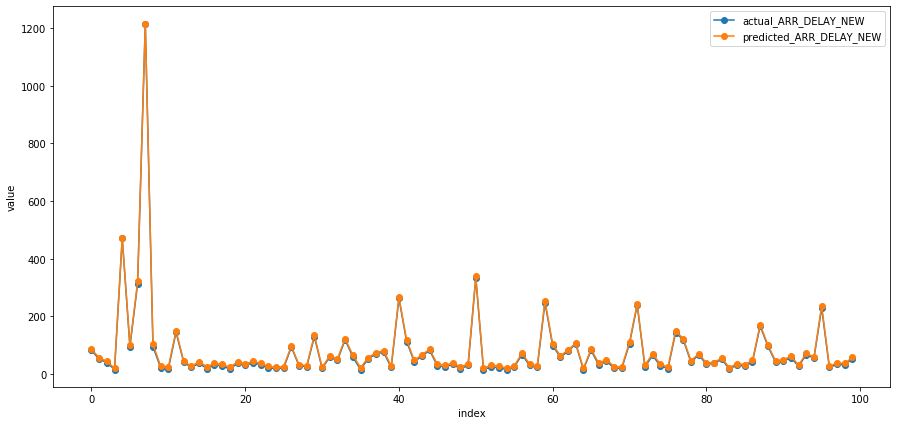

In [12]:
x = np.arange(len(y_test[:100]))

plt.figure(figsize=(15, 7))
plt.plot(x, y_test[:100], '-o', label='actual_ARR_DELAY_NEW')
plt.plot(x, y_pred[:100], '-o', label='predicted_ARR_DELAY_NEW')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()